<font color='red' size='5px'>Decision Trees and Random Forests Theory<font/>
   

<font color='blue' size='5px'>Introduction<font/>
   

## Defination
    Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

## How it Works
- The main idea that we make a decision tree and the end leaf is the class
- The brach which we take depends on impurity, or information gain


## Terminology
- Nodes: Split for the value of a certain attribute
- Edges: Outcome of a split to next node
- Root:The node that performs the first split
- Leaves: Terminal nodes that predict the outcome (the last node)
- Information gain: It's calculated from probability, and it gives you an indication to which path to take(which path represent your data the most)
- Maximize your information gain from the choosing the decision root: Choosing the path that maximize your information gain

## Over Fitting & Under Fitting
- Overfitting happens if you go real deep in the tree, so you should limit your depth, but not too much or you will be high bias
- To over come the problem of depth, we use random forest with different pathes, then aggregate their result.


In [5]:
from IPython.display import Image

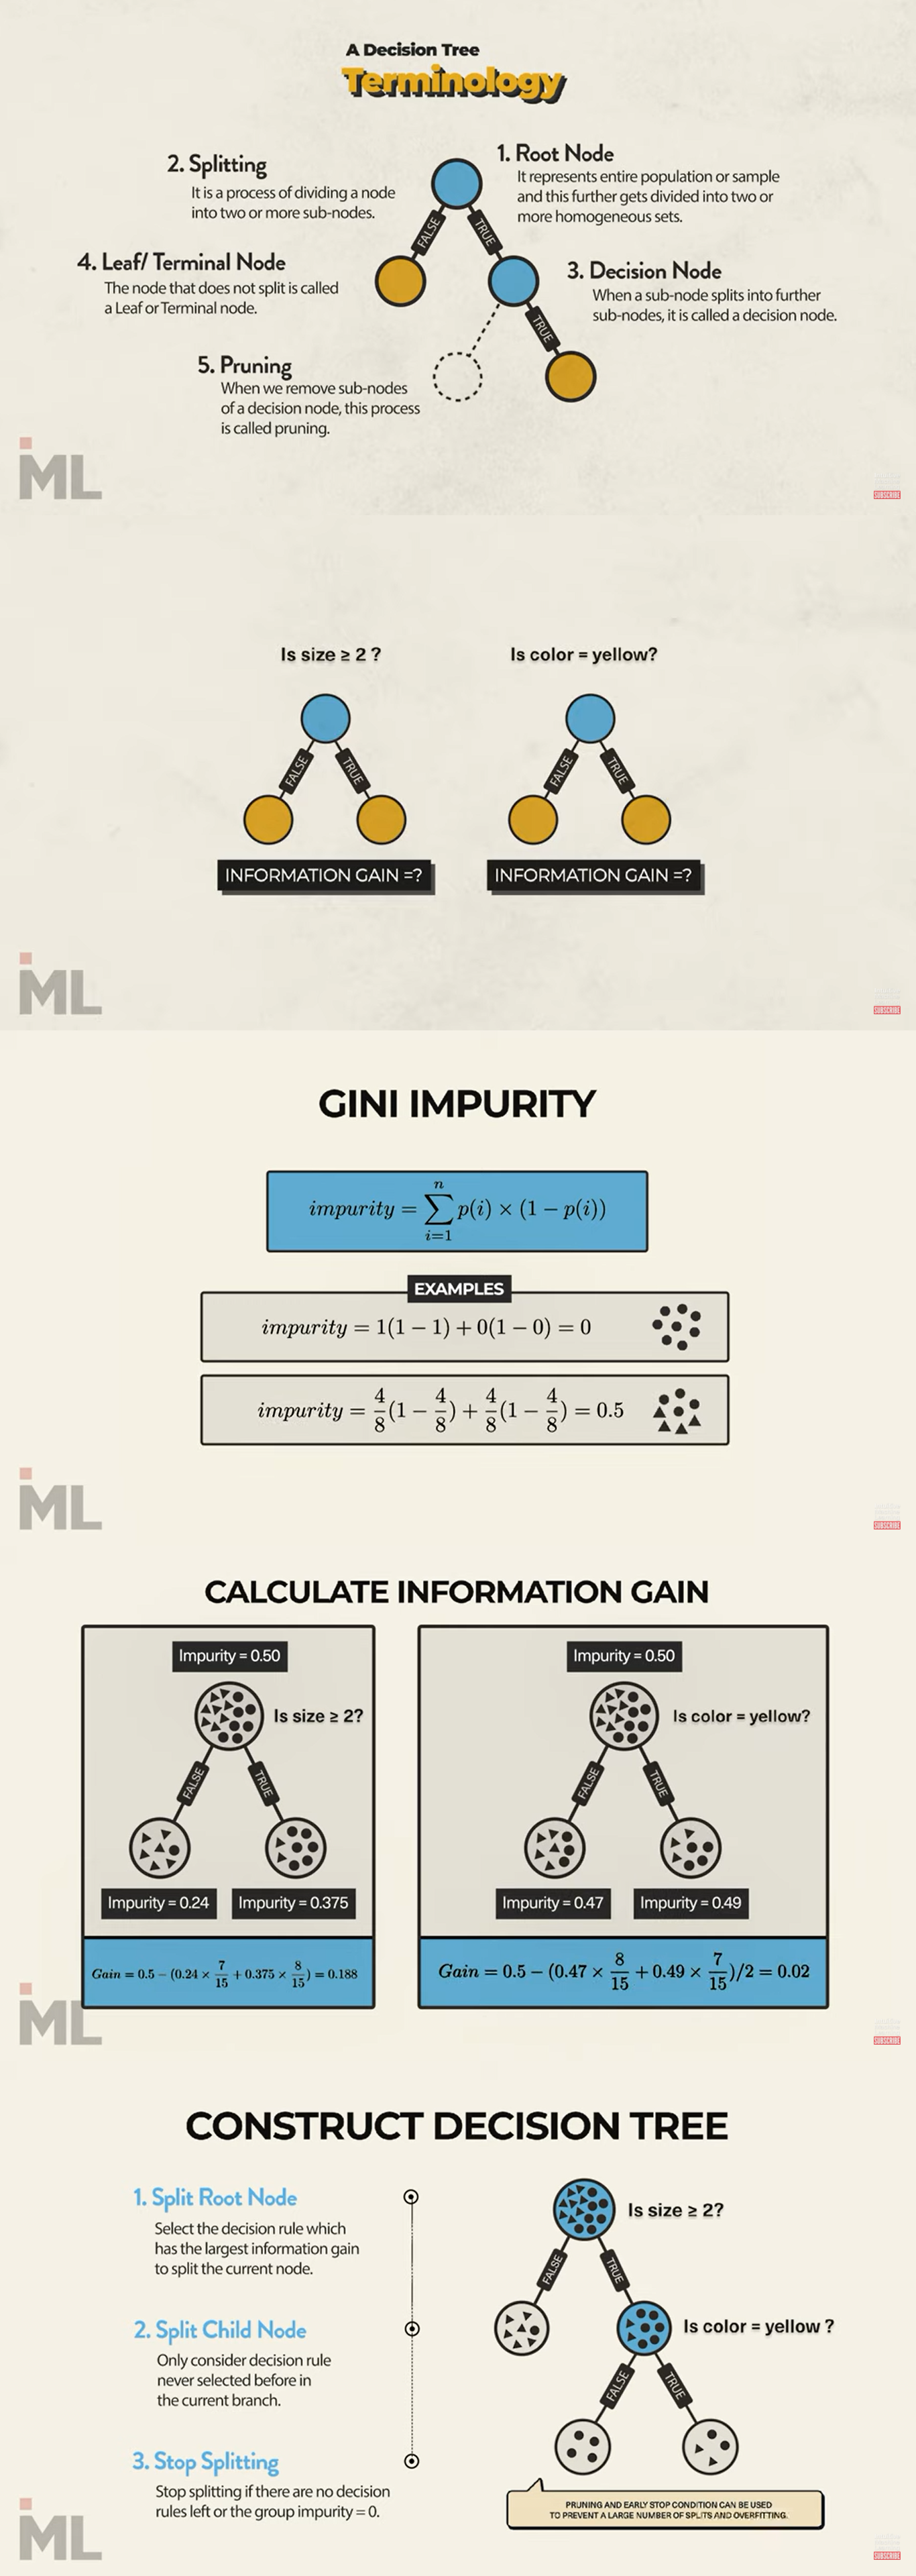

In [6]:
Image('D.Tree .png')

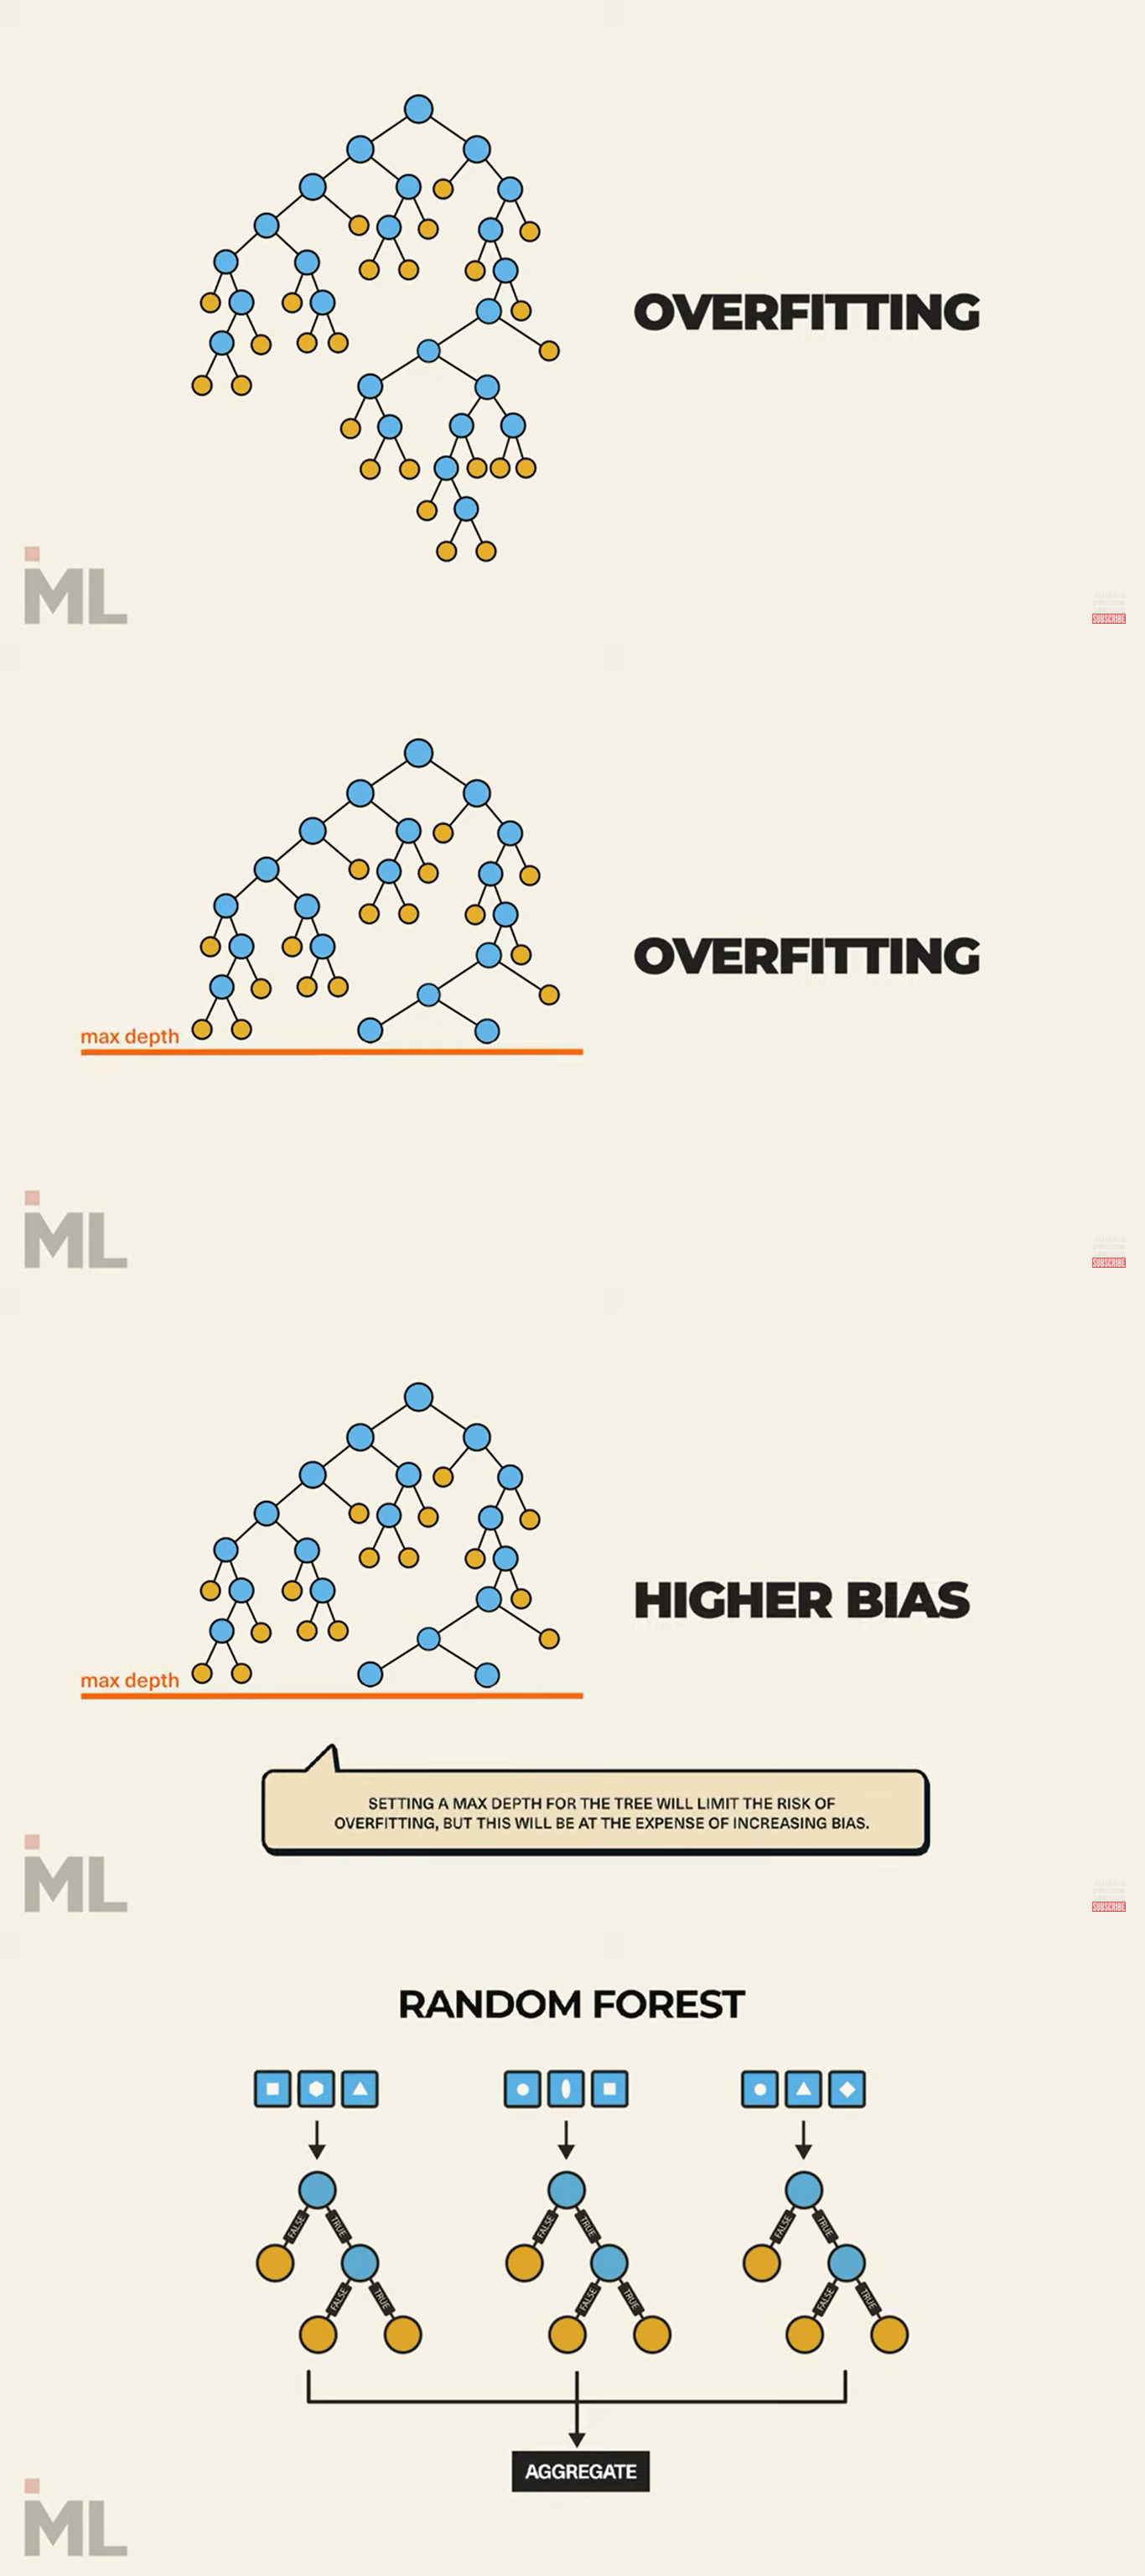

In [7]:
Image('D.Tree 2.png')

<font color='blue' size='5px'> Random Forest<font/>

## Defination
- Random forests or random decision forests: 
    - An ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned

## How it Works
- The main idea that it uses bagging to ensembele multiple Decision trees
- Bagging: Generate more data from small data(Bootstrapping), aggregrate that data, then make a decision based on average

## Decision Tree vs Random Forest
- DT
    - Decision tree doesn't have the best predictive accuracy due to high variance (different split leads to different trees)
    - If you have a strong feature that repreasent the target all decisio trees will take it as the head, and that would result in similar DT
- RF
    - RandomForest used to imporve the high variance error by Bagging, and Randomly leaving out candidate
    - Bagging: Used to overcome the high variance

    - Randomly leaving out candidate feature from each split decorrelates the different trees to reduce the variance

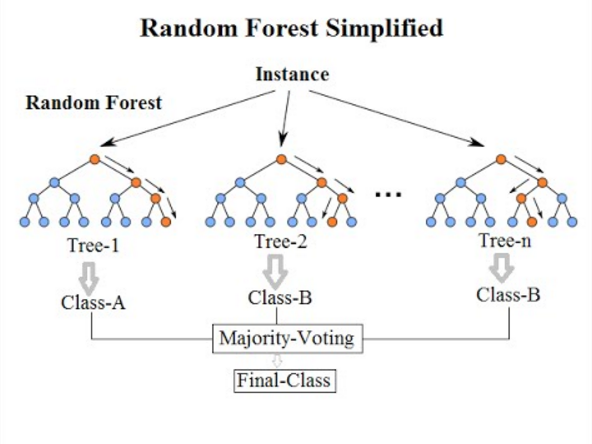

In [145]:
Image('RandomForest.png')

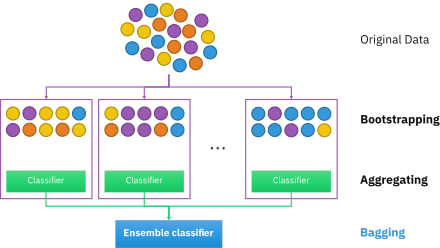

In [146]:
Image('Bootstrap.png')

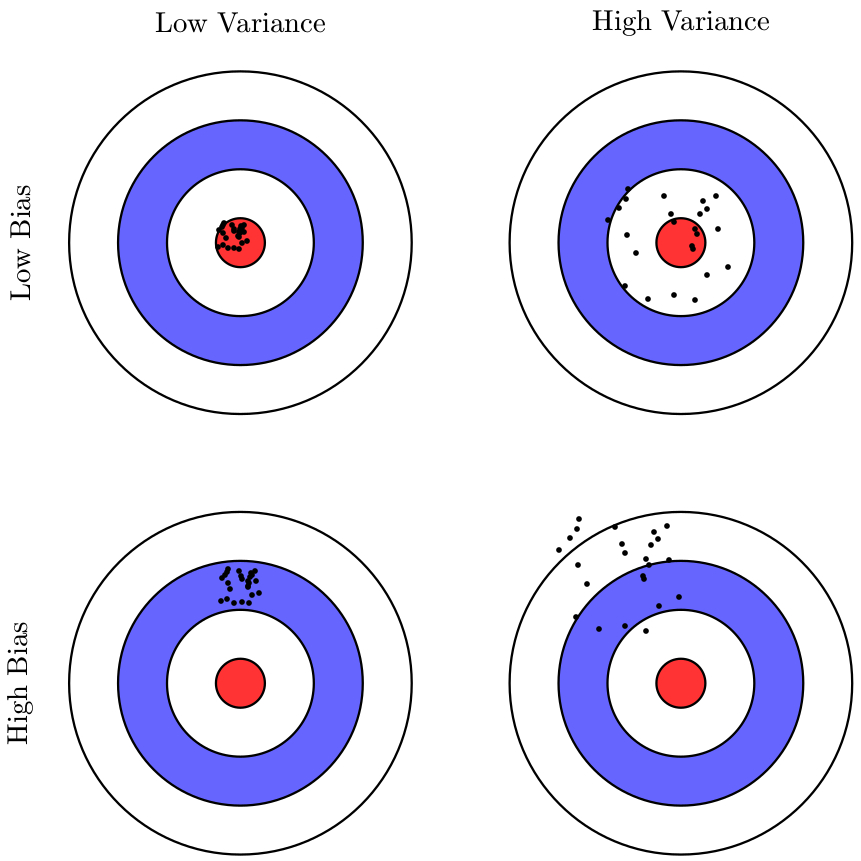

In [144]:
Image('ic4Q8.jpg')

<font color='red' size='5px'> Examples<font/>

<font color='blue' size='5px'> Kyphosis<font/>

- Predict if spine surgery was successful (Using Decision Tree)

In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('kyphosis.csv')

In [28]:
df.head()
    # It represent number of patient that has Kyphosis, and they had an opperation to correct their spine 
    # Kyphosis columns represent if the illness exist after the operation
    # Number represent the number of vertebrae involved in operation
    # Age: is the number of months for kids
    # Start the location of the top most vertebrae operated on

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

In [16]:
df.describe()

Age     Number      Start
count   81.000000  81.000000  81.000000
mean    83.654321   4.049383  11.493827
std     58.104251   1.619423   4.883962
min      1.000000   2.000000   1.000000
25%     26.000000   3.000000   9.000000
50%     87.000000   4.000000  13.000000
75%    130.000000   5.000000  16.000000
max    206.000000  10.000000  18.000000

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [24]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

## Visualization

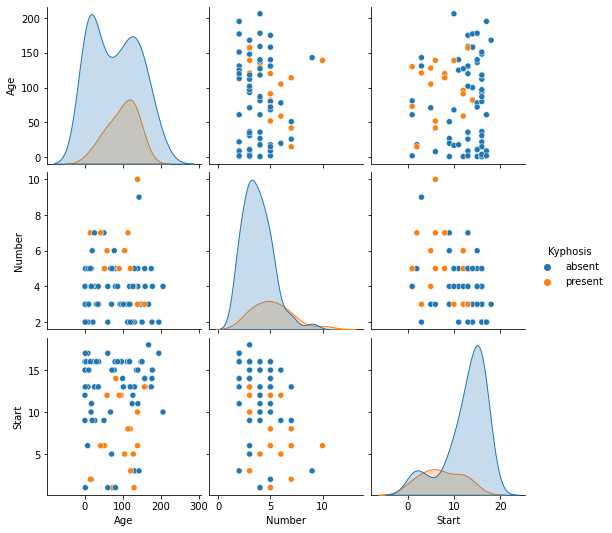

In [25]:
sns.pairplot(df,diag_kind='kde',hue='Kyphosis')

<AxesSubplot:>

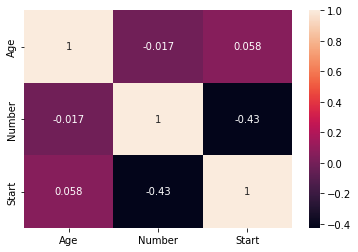

In [27]:
sns.heatmap(df.corr(),annot=True)

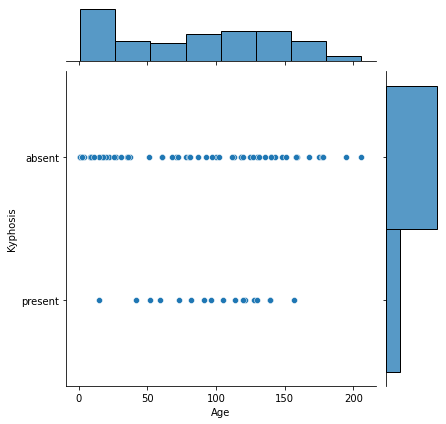

In [32]:
sns.jointplot(y='Kyphosis',x='Age',data=df)

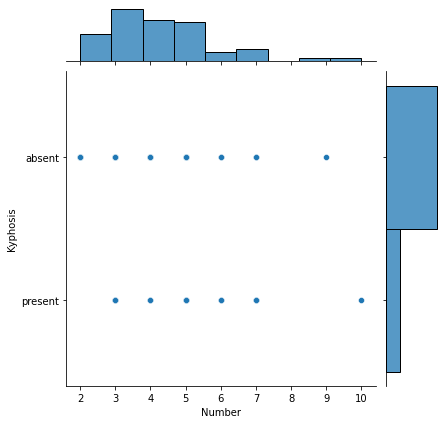

In [35]:
sns.jointplot(y='Kyphosis',x='Number',data=df)

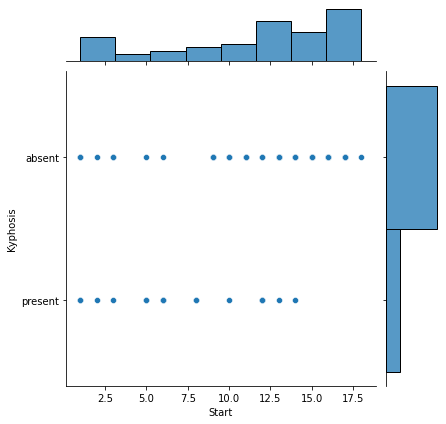

In [34]:
sns.jointplot(y='Kyphosis',x='Start',data=df)

## Preprocessing

In [5]:
X=df.drop('Kyphosis',axis=1)

In [6]:
y=df['Kyphosis']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

## Training

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree=DecisionTreeClassifier()

In [11]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction

In [12]:
y_pred=dtree.predict(X_test)

In [ ]:
#theta_coef=LR.coef_

In [84]:
#theta=pd.DataFrame(theta_coef.reshape(3,1),index=X_train.columns,columns=['Coeff'])

In [85]:
#theta

## Evaluation

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [14]:
accuracy_score(y_test,y_pred)

0.88

In [15]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[19  2]
 [ 1  3]]


              precision    recall  f1-score   support

      absent       0.95      0.90      0.93        21
     present       0.60      0.75      0.67         4

    accuracy                           0.88        25
   macro avg       0.77      0.83      0.80        25
weighted avg       0.89      0.88      0.89        25



<font color='blue' size='5px'> Kyphosis(Random Forest)<font/>
    

## Preprocessing

In [118]:
X

Age  Number  Start
0    71       3      5
1   158       3     14
2   128       4      5
3     2       5      1
4     1       4     15
..  ...     ...    ...
76  157       3     13
77   26       7     13
78  120       2     13
79   42       7      6
80   36       4     13

[81 rows x 3 columns]

In [119]:
y

0      absent
1      absent
2     present
3      absent
4      absent
       ...   
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

## Training

In [120]:
from sklearn.ensemble import RandomForestClassifier
    # It's ensemble of Decision Trees

In [121]:
RF=RandomForestClassifier(n_estimators=200)

In [122]:
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

## Prediction

In [123]:
y_pred=RF.predict(X_test)

## Evaluation

In [124]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[19  0]
 [ 4  2]]


              precision    recall  f1-score   support

      absent       0.83      1.00      0.90        19
     present       1.00      0.33      0.50         6

    accuracy                           0.84        25
   macro avg       0.91      0.67      0.70        25
weighted avg       0.87      0.84      0.81        25



<font size='4px'>We compare depending on absent vs present depending on what we care for more<font/>

<font size='4px'>As data set gets larger Random forest will perform better<font/>

In [136]:
df['Kyphosis'].value_counts()
    # We can see that our data is a  little bit bias toward absent

absent     64
present    17
Name: Kyphosis, dtype: int64

<font color='blue' size='4px'>Tree Visualization <font/>
    


- It is used for Decision Tree not random forest
- It comes with pydot ( To make a graph object)
    - pip install pydot
- You will need graphviz lib too ( To turn graph object into PNG)
    - pip install graphvis

from IPython.display import Image  
from sklearn.externals.conftest import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  